Reference: https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
loan_data = pd.read_csv("./data/loan_data3.csv")
loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
loan_data.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

In [4]:
cleaned_data = loan_data.drop(['purpose', 'not_fully_paid'], axis=1)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   int_rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log_annual_inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days_with_cr_line  9578 non-null   float64
 7   revol_bal          9578 non-null   int64  
 8   revol_util         9578 non-null   float64
 9   inq_last_6mths     9578 non-null   int64  
 10  delinq_2yrs        9578 non-null   int64  
 11  pub_rec            9578 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 898.1 KB


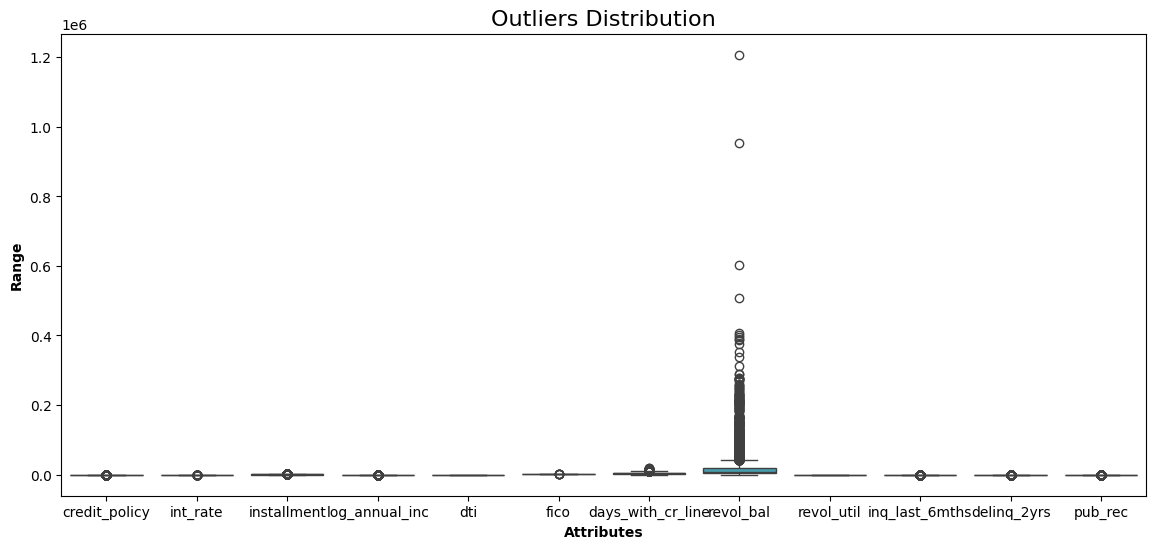

In [5]:
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
   
show_boxplot(cleaned_data)

In [6]:
def remove_outliers(data):
    
    df = data.copy()
    
    for col in list(df.columns):
    
        Q1 = df[str(col)].quantile(0.05)
        Q3 = df[str(col)].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
    
        df = df[(df[str(col)] >= lower_bound) & 

            (df[str(col)] <= upper_bound)]
    
    return df


In [7]:
without_outliers = remove_outliers(cleaned_data)

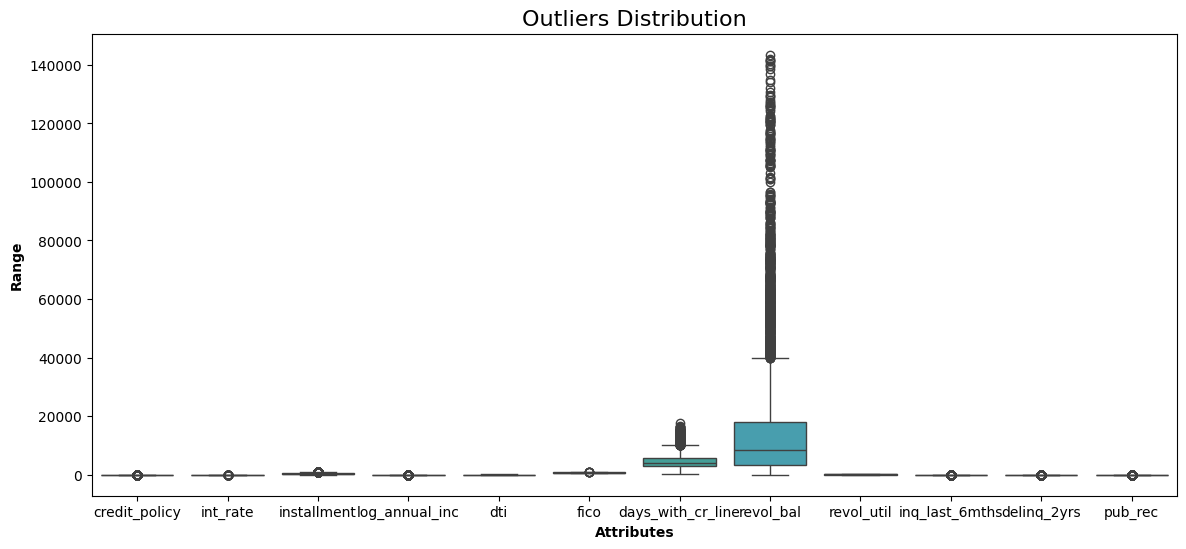

In [8]:
show_boxplot(without_outliers)

In [9]:
without_outliers.shape

(9319, 12)

In [10]:
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()

scaled_data = data_scaler.fit_transform(without_outliers)
scaled_data.shape

(9319, 12)

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

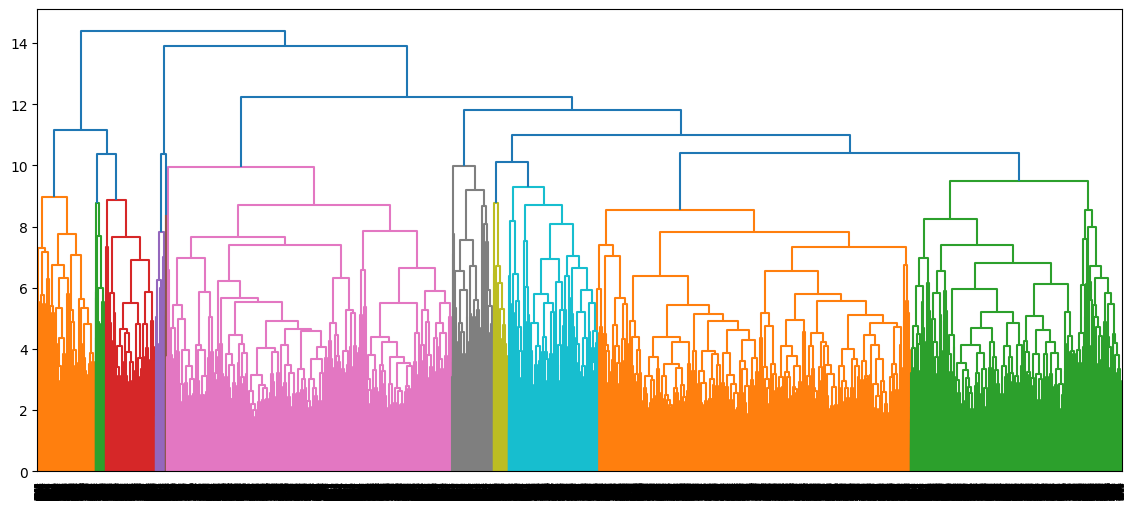

In [22]:
dendrogram(complete_clustering)
plt.show()

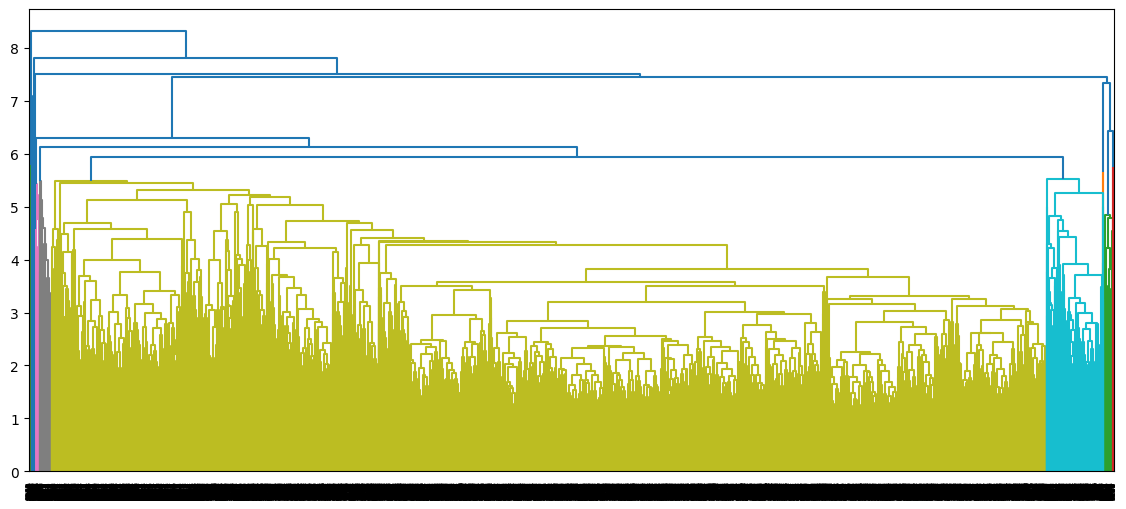

In [23]:
dendrogram(average_clustering)
plt.show()

<Axes: xlabel='Cluster', ylabel='fico'>

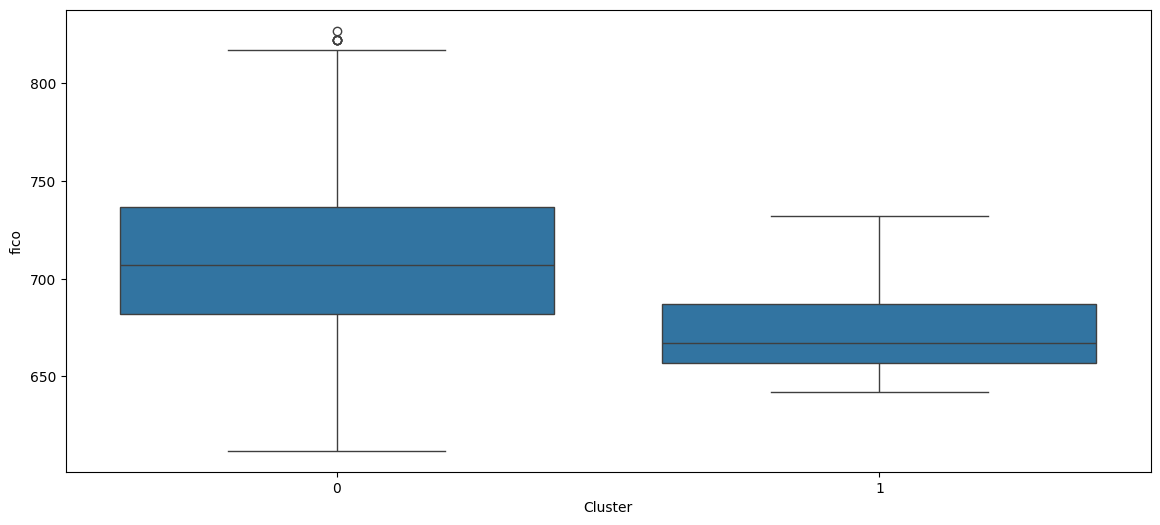

In [12]:
from scipy.cluster.hierarchy import cut_tree
cluster_labels = cut_tree(average_clustering, n_clusters=2).reshape(-1, )
without_outliers["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='fico', data=without_outliers)